In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import random 

plt.style.use(['science', 'retro', 'grid'])

import sys
import cvxopt as opt
sys.path.insert(0, os.path.abspath('../../src/rl/dir_vec/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/base'))
sys.path.insert(2, os.path.abspath('../../src/mpt/efficient_frontier/'))
sys.path.insert(3, os.path.abspath('../../src/mpt/utils'))

In [5]:
import importlib
importlib.reload(sys.modules['EfficientFrontier'])
importlib.reload(sys.modules['MarketFactory'])
importlib.reload(sys.modules['GenerativeMarketEnv'])
importlib.reload(sys.modules['HarnessVec'])
importlib.reload(sys.modules['ParallelRunnerVec'])
importlib.reload(sys.modules['DirichletPolicyVec'])

<module 'DirichletPolicyVec' from '/Users/michael/UCL/Disertation/porfolio-optimisation/src/rl/dir_vec/DirichletPolicyVec.py'>

In [6]:
from GenerativeMarketEnv import GenerativeMarketEnv
from DirichletPolicyVec import DirichletPolicyVec
from HarnessVec import HarnessVec
from ParallelRunnerVec import ParallelRunnerVec
from EfficientFrontier import EfficientFrontier
from MarketFactory import MarketFactory

In [7]:
# stocks to consider 
stocks = ['AAPL' ,'ADBE' ,'ADI' ,'ADP' ,'ADSK' ,'AEP' ,'ALGN' ,'ALXN' ,'AMAT' ,'AMD' ,'AMGN' ,'AMZN' ,'ANSS' ,'ASML' ,'ATVI'
 ,'AVGO' ,'BIDU' ,'BIIB' ,'BKNG' ,'CDNS' ,'CDW' ,'CERN' ,'CHKP' ,'CHTR' ,'CMCSA' ,'COST' ,'CPRT' ,'CSCO' ,'CSX' ,'CTAS'
 ,'CTSH' ,'DLTR' ,'DOCU' ,'DXCM' ,'EA' ,'EBAY' ,'EXC' ,'FAST' ,'FB' ,'FISV' ,'FOX' ,'FOXA' ,'GILD' ,'GOOG' ,'GOOGL'
 ,'IDXX' ,'ILMN' ,'INCY' ,'INTC' ,'INTU' ,'ISRG' ,'JD' ,'KDP' ,'KHC' ,'KLAC' ,'LRCX' ,'LULU' ,'MAR' ,'MCHP' ,'MDLZ'
 ,'MELI' ,'MNST' ,'MRNA' ,'MRVL' ,'MSFT' ,'MTCH' ,'MU' ,'MXIM' ,'NFLX' ,'NTES' ,'NVDA' ,'NXPI' ,'OKTA' ,'ORLY' ,'PAYX'
 ,'PCAR' ,'PDD' ,'PEP' ,'PTON' ,'PYPL' ,'QCOM' ,'REGN' ,'ROST' ,'SBUX' ,'SGEN' ,'SIRI' ,'SNPS' ,'SPLK' ,'SWKS' ,'TCOM'
 ,'TEAM' ,'TMUS' ,'TSLA' ,'TXN' ,'VRSK' ,'VRSN' ,'VRTX' ,'WBA' ,'WDAY' ,'XEL' ,'XLNX' ,'ZM']

In [68]:
sampled_stocks_10 = stocks[:10]
factory = MarketFactory(sampled_stocks_10, "2020-01-01", "2021-01-01")
market = factory.create_market()

[*********************100%***********************]  10 of 10 completed


In [12]:
Σ = market.Σ

In [32]:
av_var = np.mean(np.diag(Σ))


av_covar = np.mean(Σ[~np.eye(Σ.shape[0], dtype=bool)])

In [33]:
av_covar

0.0005956635855435977

In [77]:
var= []

for i in range(50):
    n =  i+1
    v = av_var/n
    c = ((n-1)/n)*av_covar
    var.append(np.sqrt(v+c))

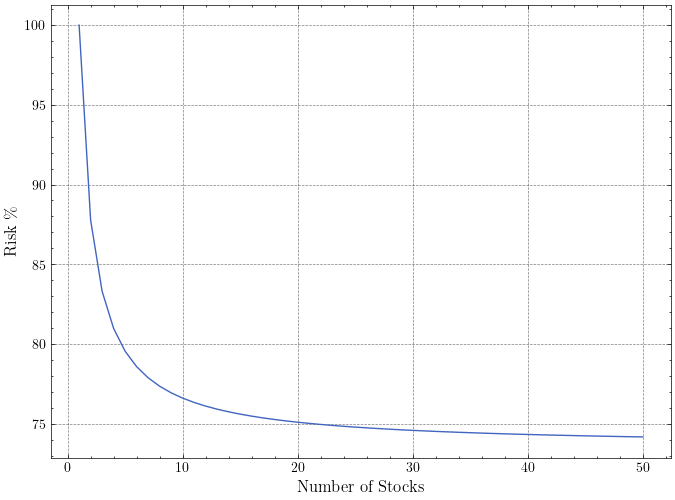

In [80]:
plt.figure(figsize=(8, 6), dpi=100)
plt.ylabel(r'Risk \%', size=12)
plt.xlabel(r'Number of Stocks', size=12)
plt.plot(range(1, n+1), np.array(var)/max(var)*100)
plt.savefig('./diversification_effect')

In [79]:
var

[0.03318480952320983,
 0.02912812359761023,
 0.027643918886311528,
 0.026871091993639334,
 0.02639653736862511,
 0.0260753699584164,
 0.02584352114541146,
 0.025668260268999783,
 0.025531114497674964,
 0.025420865156371247,
 0.025330304234126893,
 0.025254588731672925,
 0.025190344013308708,
 0.025135146416292536,
 0.02508721026167462,
 0.025045190863524185,
 0.02500805629226343,
 0.024975001431801626,
 0.024945388902957888,
 0.02491870753913621,
 0.024894542616676212,
 0.02487255413238681,
 0.024852460699663095,
 0.02483402743766644,
 0.024817056744213698,
 0.024801381181825698,
 0.024786857933056544,
 0.02477336443553904,
 0.024760794913923804,
 0.024749057600816544,
 0.024738072492128307,
 0.02472776952066192,
 0.024718087059753244,
 0.024708970689413738,
 0.024700372172773915,
 0.024692248602163503,
 0.02468456168290883,
 0.024677277129612703,
 0.024670364154831828,
 0.02466379503406361,
 0.024657544734078128,
 0.02465159059408851,
 0.024645912051198562,
 0.024640490403116066,
 0.0